## Data Analysis

In this first part of the project we will perform the analysis of translator assingment patterns. 

**Installation**  
Uncomment the library and execute the cell

**Install All Packages**  
If you want to install all packages used in this project, you can use the provided requirements.txt file:  

`pip install -r requirements.txt`


**Recreating the Environment**  
If you want to recreate our exact environment, you can use the provided environment.yml file:

`conda env create -f environment.yml`

This command will create a new conda environment named `environment`, if you need to change the name of the environment simply edit this name in the corresponding file (environment.yml).

In [21]:
'''
## TODO complete instalation of the packages
# Installation of required packages
    
# By using pip
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

# By using conda
!conda install -c conda-forge numpy -y
!conda install -c conda-forge pandas -y
!conda install -c conda-forge matplotlib -y
!conda install -c conda-forge seaborn -y

# Check versions
!pip show numpy
!pip show pandas
!pip show matplotlib
!pip show seaborn
'''

'\n## TODO complete instalation of the packages\n# Installation of required packages\n    \n# By using pip\n!pip install numpy\n!pip install pandas\n!pip install matplotlib\n!pip install seaborn\n\n# By using conda\n!conda install -c conda-forge numpy -y\n!conda install -c conda-forge pandas -y\n!conda install -c conda-forge matplotlib -y\n!conda install -c conda-forge seaborn -y\n\n# Check versions\n!pip show numpy\n!pip show pandas\n!pip show matplotlib\n!pip show seaborn\n'

**Import libraries**

In [ ]:
## TODO complete this with all libraries used
import os
import numpy as np
import seaborn as sns
import pandas as pd

from matplotlib import rcParams
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.projections.polar import PolarAxes
import matplotlib.cm as cm

from IPython.display import display
from datetime import time, datetime
from collections import defaultdict, Counter

import sys
sys.path.append('../utils') 
from cleaning_utils import drop_invalid_dates, drop_invalid_rows

**Environmental Configurations**

In [23]:
plt.rcParams['font.family'] = 'Arial'
rcParams["font.size"] = 15             # Sets the font size for all text elements in plots
rcParams["legend.loc"] = "best"        # Automatically places the legend in the best position
rcParams["figure.figsize"] = (12, 7)   # Sets the default figure size to 12x7 inches

pd.set_option('display.max_columns', None)        # Muestra todas las columnas
pd.set_option('display.width', 0)                 # Ajuste automático al ancho disponible
pd.set_option('display.max_colwidth', None)       # Muestra contenido completo en columnas

**Import Data**

Data Directory

In [24]:
data_path = os.path.join("..", "Data")

In [25]:
schedules_df = pd.read_excel(os.path.join(data_path, "Schedules.xlsx"))
data_df = pd.read_excel(os.path.join(data_path, "Data.xlsx"), parse_dates=["END", "ASSIGNED", "READY", "WORKING", "RECEIVED","CLOSE", "DELIVERED", "START"])
clients_df = pd.read_excel(os.path.join(data_path, "Clients.xlsx"))
transl_cost_pairs_df = pd.read_excel(os.path.join(data_path, "TranslatorsCost+Pairs.xlsx"))

In [ ]:
data_df['START'] = pd.to_datetime(data_df['START'], errors='coerce')

 **Data Overview**

First look at the data and some basic information

In [26]:
print("\nData Info:")
data_df.info()
data_df.describe()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554029 entries, 0 to 554028
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   PROJECT_ID                   554029 non-null  object        
 1   PM                           554029 non-null  object        
 2   TASK_ID                      554029 non-null  int64         
 3   START                        554029 non-null  object        
 4   END                          554029 non-null  datetime64[ns]
 5   TASK_TYPE                    554029 non-null  object        
 6   SOURCE_LANG                  554029 non-null  object        
 7   TARGET_LANG                  554029 non-null  object        
 8   TRANSLATOR                   554029 non-null  object        
 9   ASSIGNED                     554029 non-null  datetime64[ns]
 10  READY                        554029 non-null  datetime64[ns]
 11  WORKING       

,TASK_ID,END,ASSIGNED,READY,WORKING,DELIVERED,RECEIVED,CLOSE,FORECAST,HOURLY_RATE,COST,QUALITY_EVALUATION
count,5.540290e+05,554029,554029,554029,554029,554029,554029,554029,554029.000000,554029.000000,554029.000000,554029.000000
mean,1.067535e+07,2018-03-22 11:23:06.568599808,2018-03-19 20:40:49.710924544,2018-03-20 09:01:30.532499456,2018-03-21 06:02:55.127392768,2018-03-22 02:34:53.842454016,2018-03-22 10:09:04.660346368,2018-03-22 12:53:49.115781120,2.342250,16.373515,37.883495,7.064479
min,1.004828e+07,2009-11-06 19:00:00,2010-01-04 09:35:57,2010-01-04 09:37:06,2010-01-04 10:11:55,2010-01-04 10:42:22,2010-01-04 14:08:41,2010-01-04 14:08:41,0.000000,8.000000,0.000000,0.000000
25%,1.038542e+07,2015-09-17 09:00:00,2015-09-15 09:58:47,2015-09-15 11:41:40,2015-09-16 08:05:51,2015-09-16 17:09:40,2015-09-17 07:52:35,2015-09-17 12:06:00,0.110000,13.000000,1.820000,6.000000
50%,1.068016e+07,2018-11-13 21:00:00,2018-11-12 09:44:32,2018-11-12 10:27:24,2018-11-13 10:26:06,2018-11-13 16:15:54,2018-11-13 20:09:24,2018-11-14 00:44:25,0.490000,15.000000,7.310000,7.000000
75%,1.096631e+07,2021-02-09 10:28:00,2021-02-05 11:41:04,2021-02-08 09:45:19,2021-02-08 15:55:07,2021-02-08 19:11:55,2021-02-09 08:04:51,2021-02-09 08:40:31,1.600000,17.000000,25.610000,8.000000
max,1.124191e+07,2023-12-30 16:00:00,2022-12-31 19:14:44,2023-02-10 13:53:38,2023-02-28 09:45:32,2023-02-28 09:45:34,2023-02-28 15:57:36,2023-02-28 15:57:38,324.830000,62.000000,12275.600000,10.000000
std,3.299086e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.743276,5.190844,121.788621,1.474791


In [27]:
print("\nSchedules Info:")
schedules_df.info()
schedules_df.describe()


Schedules Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NAME    871 non-null    object
 1   START   871 non-null    object
 2   END     871 non-null    object
 3   MON     871 non-null    int64 
 4   TUE     871 non-null    int64 
 5   WED     871 non-null    int64 
 6   THU     871 non-null    int64 
 7   FRI     871 non-null    int64 
 8   SAT     871 non-null    int64 
 9   SUN     871 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 68.2+ KB


,MON,TUE,WED,THU,FRI,SAT,SUN
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,0.795637,0.787600,0.785304,0.784156,0.799082,0.469575,0.475316
std,0.403467,0.409241,0.410847,0.411643,0.400917,0.499360,0.499677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Filter rows where END is between 00:00 y 06:00
filtered = schedules_df[
    schedules_df["END"].apply(lambda x: x is not None and time(0, 0) <= x <= time(6, 0))
]

display(filtered)

In [28]:
print("\nClients Info:")
clients_df.info()
clients_df.describe()


Clients Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLIENT_NAME           2567 non-null   object 
 1   SELLING_HOURLY_PRICE  2567 non-null   int64  
 2   MIN_QUALITY           2567 non-null   float64
 3   WILDCARD              2567 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 80.3+ KB


,SELLING_HOURLY_PRICE,MIN_QUALITY
count,2567.000000,2567.000000
mean,26.172575,5.567589
std,6.904328,3.174886
min,20.000000,0.000000
25%,20.000000,7.000000
50%,25.000000,7.000000
75%,25.000000,7.500000
max,90.000000,8.000000


In [29]:
print("\nTranslators Cost + Pairs Info:")
transl_cost_pairs_df.info()
transl_cost_pairs_df.describe()


Translators Cost + Pairs Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3794 entries, 0 to 3793
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TRANSLATOR   3794 non-null   object
 1   SOURCE_LANG  3794 non-null   object
 2   TARGET_LANG  3794 non-null   object
 3   HOURLY_RATE  3794 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 118.7+ KB


,HOURLY_RATE
count,3794.000000
mean,20.606747
std,8.422430
min,8.000000
25%,15.000000
50%,18.000000
75%,24.000000
max,60.000000


In [30]:
data_df.head()

,PROJECT_ID,PM,TASK_ID,START,END,TASK_TYPE,SOURCE_LANG,TARGET_LANG,TRANSLATOR,ASSIGNED,READY,WORKING,DELIVERED,RECEIVED,CLOSE,FORECAST,HOURLY_RATE,COST,QUALITY_EVALUATION,MANUFACTURER,MANUFACTURER_SECTOR,MANUFACTURER_INDUSTRY_GROUP,MANUFACTURER_INDUSTRY,MANUFACTURER_SUBINDUSTRY
0,212331,PMT,10048285,2013-11-01 13:13:00,2013-10-31 19:00:00,Miscellaneous,Catalan,Catalan,Victor,2013-10-31 13:14:35,2013-10-31 13:18:25,2013-10-31 13:18:27,2013-10-31 13:18:29,2013-10-31 13:18:31,2013-10-31 13:18:34,0.00,13,0.00,5,SunTech,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals"
1,211096,PMT,10048285,2012-10-26 17:24:00,2012-11-30 19:00:00,Miscellaneous,English,Galician,Severino,2012-10-26 17:25:26,2012-10-26 17:25:41,2012-10-30 13:55:47,2012-11-30 12:57:37,2012-11-30 13:38:12,2012-11-30 13:38:12,3.10,17,52.70,8,NexisOne,Technology Hardware,Technology,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals"
2,214198,KMT,10048285,2015-09-09 17:29:00,2015-09-10 11:00:00,Engineering,English,Spanish (Iberian),Jeronimo,2015-09-09 17:31:52,2015-09-09 17:34:56,2015-09-09 17:35:48,2015-09-10 16:42:21,2015-09-10 17:33:05,2015-09-10 17:33:07,1.50,11,16.50,9,HealthyLife,Health Care,Health Care Providers,Health Care Facilities,Long-Term Care Facilities
3,213494,KMT,10048285,2014-11-26 10:36:00,2014-11-26 15:30:00,Engineering,English,Portuguese (Brazil),Estela,2014-11-26 16:34:23,2014-11-26 16:34:25,2014-11-26 16:34:27,2014-11-26 17:50:07,2014-11-26 17:51:46,2014-11-26 17:51:48,0.25,17,4.25,7,Coastal Cottage,Consumer Discretionary,Consumer Services,"Hotels, Restaurants & Leisure","Hotels, Resorts & Cruise Lines"
4,212331,PMT,10048286,2013-11-01 13:13:00,2013-10-31 19:00:00,Management,Catalan,Spanish (Global),Maria Alexandra,2013-10-31 13:14:35,2013-10-31 13:17:56,2013-10-31 13:17:58,2013-10-31 13:18:03,2013-10-31 13:18:06,2013-10-31 13:18:08,0.00,20,0.00,7,SunTech,Information Technology,Technology Hardware & Equipment,"Technology Hardware, Storage & Peripherals","Technology Hardware, Storage & Peripherals"


In [31]:
schedules_df.head()

,NAME,START,END,MON,TUE,WED,THU,FRI,SAT,SUN
0,Aaron,09:00:00,19:00:00,1,1,1,1,1,0,0
1,Abdon,10:00:00,20:00:00,1,1,1,1,1,1,1
2,Abdon Isaias,09:00:00,19:00:00,1,1,1,1,1,1,1
3,Abdon Luis,04:00:00,14:00:00,0,0,0,0,1,0,0
4,Abel Irene,07:00:00,17:00:00,0,0,0,1,0,0,0


In [32]:
clients_df.head()

,CLIENT_NAME,SELLING_HOURLY_PRICE,MIN_QUALITY,WILDCARD
0,Accesstra,25,7.0,Quality
1,CureEquip Co.,20,7.5,Price
2,CyberWise,20,8.0,Quality
3,DataDriven Dynamics,25,0.0,Deadline
4,DataWise,20,8.0,Price


In [33]:
transl_cost_pairs_df.head()

,TRANSLATOR,SOURCE_LANG,TARGET_LANG,HOURLY_RATE
0,Aaron,English,Spanish (Iberian),19
1,Abdon Isaias,English,Catalan,16
2,Abdon Isaias,English,English,24
3,Abdon Isaias,English,Spanish (Global),13
4,Abdon Isaias,English,Spanish (Iberian),17


**Data cleaning**

In [34]:
# Missing Values Analysis
missing_values = data_df.isnull().sum()
print("Missing Values:\n", missing_values)

missing_values = schedules_df.isnull().sum()
print( "\n",missing_values)

missing_values = clients_df.isnull().sum()
print("\n", missing_values)

missing_values = transl_cost_pairs_df.isnull().sum()
print("\n", missing_values)

Missing Values:
 PROJECT_ID                     0
PM                             0
TASK_ID                        0
START                          0
END                            0
TASK_TYPE                      0
SOURCE_LANG                    0
TARGET_LANG                    0
TRANSLATOR                     0
ASSIGNED                       0
READY                          0
WORKING                        0
DELIVERED                      0
RECEIVED                       0
CLOSE                          0
FORECAST                       0
HOURLY_RATE                    0
COST                           0
QUALITY_EVALUATION             0
MANUFACTURER                   5
MANUFACTURER_SECTOR            5
MANUFACTURER_INDUSTRY_GROUP    5
MANUFACTURER_INDUSTRY          5
MANUFACTURER_SUBINDUSTRY       5
dtype: int64

 NAME     0
START    0
END      0
MON      0
TUE      0
WED      0
THU      0
FRI      0
SAT      0
SUN      0
dtype: int64

 CLIENT_NAME             0
SELLING_HOURLY_PRICE    0

In [36]:
# Filtrar filas donde START es igual a END
same_start_end = data_df[data_df["START"] == data_df["END"]]

display(same_start_end)

,PROJECT_ID,PM,TASK_ID,START,END,TASK_TYPE,SOURCE_LANG,TARGET_LANG,TRANSLATOR,ASSIGNED,READY,WORKING,DELIVERED,RECEIVED,CLOSE,FORECAST,HOURLY_RATE,COST,QUALITY_EVALUATION,MANUFACTURER,MANUFACTURER_SECTOR,MANUFACTURER_INDUSTRY_GROUP,MANUFACTURER_INDUSTRY,MANUFACTURER_SUBINDUSTRY


In [ ]:
# Function to detect and remove invalid dates
data_df, start_invalid_dates = drop_invalid_dates(data_df, 'START')
data_df, end_invalid_dates = drop_invalid_dates(data_df, 'END')
data_df, delivered_invalid_dates = drop_invalid_dates(data_df, 'DELIVERED')
data_df, delivered_invalid_dates = drop_invalid_dates(data_df, 'ASSIGNED')

print(" ")

# Show the invalid dates in each column
print("Invalid START dates:\n", start_invalid_dates, "\n")
print("Invalid END dates:\n", end_invalid_dates, "\n")
print("Invalid DELIVERED dates:\n", delivered_invalid_dates, "\n")


Dropping invalid rows in column 'START'...
No invalid dates found in column 'END'.
No invalid dates found in column 'DELIVERED'.
No invalid dates found in column 'ASSIGNED'.
 
Invalid START dates:
 1         2012-10-26 17:24:00
3         2014-11-26 10:36:00
5         2013-03-14 12:09:00
6         2017-12-28 16:25:00
8         2009-12-14 18:00:00
                 ...         
554019    2022-10-21 07:38:00
554020    2022-10-21 07:09:00
554021    2022-10-24 12:35:00
554026    2022-11-16 16:55:00
554027    2022-11-22 10:35:00
Name: START, Length: 336276, dtype: object 

Invalid END dates:
 Series([], Name: END, dtype: datetime64[ns]) 

Invalid DELIVERED dates:
 Series([], Name: ASSIGNED, dtype: datetime64[ns]) 



In [ ]:
data_df = drop_invalid_rows(data_df)

In [ ]:
print("\nData after dropping invalid rows:")
print(data_df.isna().sum())  # Hom many NaN by column

There is one Translator that hasn't performed any task at all 

In [ ]:
# Get the list of translators with tasks for this language pair
translators_with_tasks = data_df['TRANSLATOR'].unique()
    
# Get the list of all translators in df_filtered
all_translators = transl_cost_pairs_df['TRANSLATOR'].unique()
    
# Identify translators with no tasks for this language pair
translators_no_tasks = set(all_translators) - set(translators_with_tasks)

display(translators_no_tasks)

**Feature Engineering**

In [ ]:
'''# Function to format minutes into HH:MM format
def format_time(minutes):
    """
    Converts minutes into HH:MM format.
    Returns None for missing or negative values.
    """
    if pd.isna(minutes) or minutes is None or minutes < 0:
        return None  # Ignore invalid values
    hours = int(minutes // 60)
    mins = int(minutes % 60)
    return f"{hours:02d}:{mins:02d}"  # Formats as HH:MM

# Create new columns

# Work Duration (Actual Work Time)
if {"WORKING", "DELIVERED"}.issubset(data_df.columns):
    data_df["Actual_Work_Time_minutes"] = (data_df["DELIVERED"] - data_df["START"]).dt.total_seconds() / 60 #TODO Correct this, start is not datetime i dont now why
    data_df["Actual_Work_Time"] = data_df["Actual_Work_Time_minutes"].apply(format_time)

# Delay Time (Only if DELIVERED is later than END)
if {"DELIVERED", "END"}.issubset(data_df.columns):
    data_df["Delay_minutes"] = (data_df["DELIVERED"] - data_df["END"]).dt.total_seconds() / 60
    data_df["Delay_minutes"] = data_df["Delay_minutes"].apply(lambda x: x if x > 0 else None)  # Keep only positive delays
    data_df["Delay"] = data_df["Delay_minutes"].apply(format_time)

# Process Time (Total Time from Assignment to Close)
if {"ASSIGNED", "CLOSE"}.issubset(data_df.columns):
    data_df["Total_Process_Time_minutes"] = (data_df["CLOSE"] - data_df["ASSIGNED"]).dt.total_seconds() / 60
    data_df["Total_Process_Time"] = data_df["Total_Process_Time_minutes"].apply(format_time)

# Select relevant columns dynamically (only include if they exist)
cols = ["TASK_ID"]
if "Actual_Work_Time" in data_df.columns:
    cols.append("Actual_Work_Time")
if "Total_Process_Time" in data_df.columns:
    cols.append("Total_Process_Time")
if "Delay" in data_df.columns:
    cols.append("Delay")  # Include Delay only if it exists

# Display new metrics as a table along with the first few rows
print("\nUpdated Data with New Columns:")
display(data_df[cols].head())

## TODO Experience missing
## TODO Create a new copy of dataframe to add the columns
# # Precision Score: 1/(1 + |Delay_minutes|)
if "Delay_minutes" in data_df.columns:
    data_df["Precision_Score"] = 1 / (1 + data_df["Delay_minutes"].abs())
    print("Precision_Score calculated.")
    print(data_df[["TASK_ID", "Delay_minutes", "Precision_Score"]].head())
else:
    print("Delay_minutes column is missing.")
    '''

'# Function to format minutes into HH:MM format\ndef format_time(minutes):\n    """\n    Converts minutes into HH:MM format.\n    Returns None for missing or negative values.\n    """\n    if pd.isna(minutes) or minutes is None or minutes < 0:\n        return None  # Ignore invalid values\n    hours = int(minutes // 60)\n    mins = int(minutes % 60)\n    return f"{hours:02d}:{mins:02d}"  # Formats as HH:MM\n\n# Create new columns\n\n# Work Duration (Actual Work Time)\nif {"WORKING", "DELIVERED"}.issubset(data_df.columns):\n    data_df["Actual_Work_Time_minutes"] = (data_df["DELIVERED"] - data_df["START"]).dt.total_seconds() / 60 #TODO Correct this, start is not datetime i dont now why\n    data_df["Actual_Work_Time"] = data_df["Actual_Work_Time_minutes"].apply(format_time)\n\n# Delay Time (Only if DELIVERED is later than END)\nif {"DELIVERED", "END"}.issubset(data_df.columns):\n    data_df["Delay_minutes"] = (data_df["DELIVERED"] - data_df["END"]).dt.total_seconds() / 60\n    data_df["

**Correlation of numeric Data Columns (About Translation Tasks)**

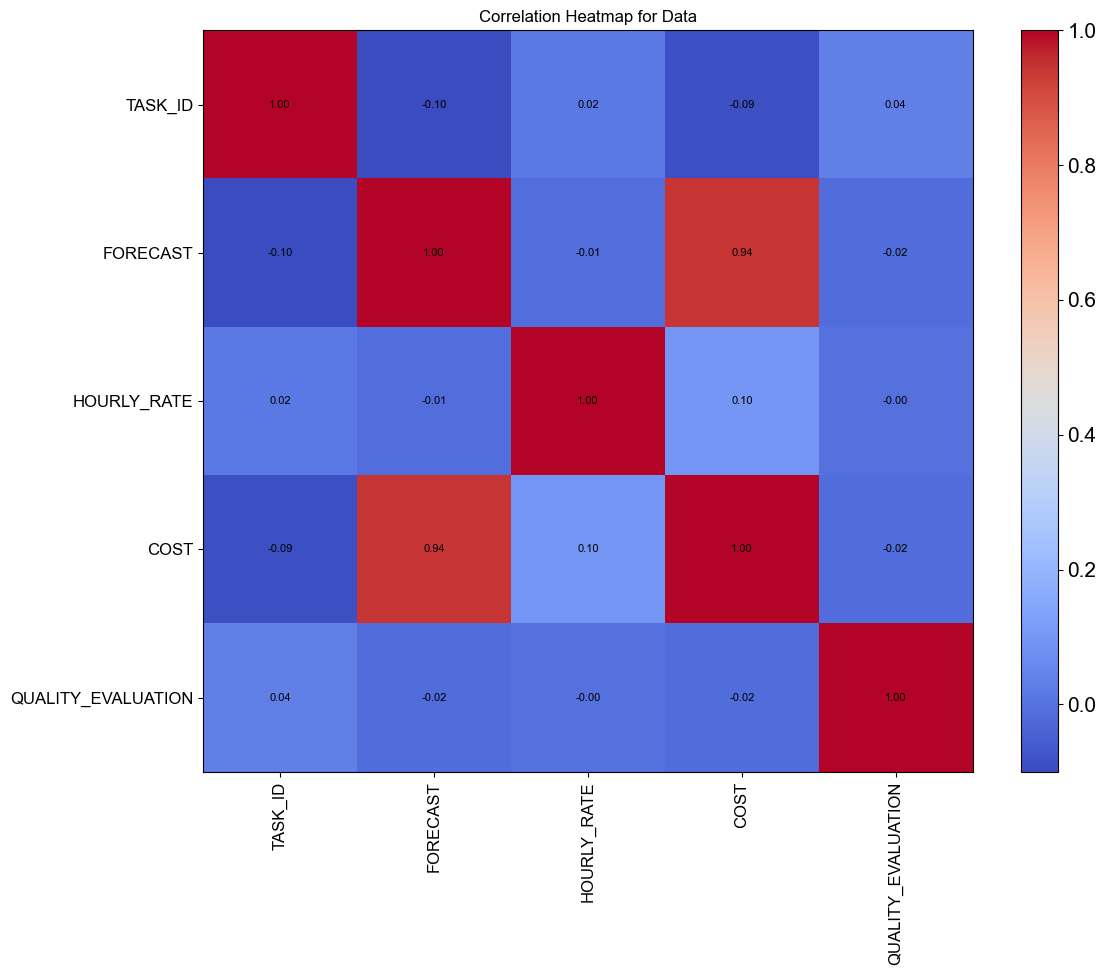

In [41]:
## Change this with a copy of the dataset with the new columns
# List of datasets
datasets = {
  "Data": data_df,
}

# Generate correlation heatmaps for each dataset
for name, df in datasets.items():
  # Select only numeric columns
  numeric_df = df.select_dtypes(include=[np.number])

  if numeric_df.empty:
      print(f"Skipping {name} dataset as it has no numeric columns.")
      continue

  corr_full = numeric_df.corr()

  plt.figure(figsize=(12, 10))
  plt.imshow(corr_full, cmap='coolwarm', interpolation='none', aspect='auto')
  plt.colorbar()
  plt.xticks(range(len(corr_full.columns)), corr_full.columns, rotation=90, fontsize=12)
  plt.yticks(range(len(corr_full.index)), corr_full.index, fontsize=12)
  plt.title(f"Correlation Heatmap for {name}", fontsize=12)

  # Annotate heatmap with correlation values
  for (i, j), val in np.ndenumerate(corr_full):
      plt.text(j, i, f"{val:.2f}", ha="center", va="center", color="black", fontsize=8)

  plt.tight_layout()
  plt.show()

**Task Type duration**

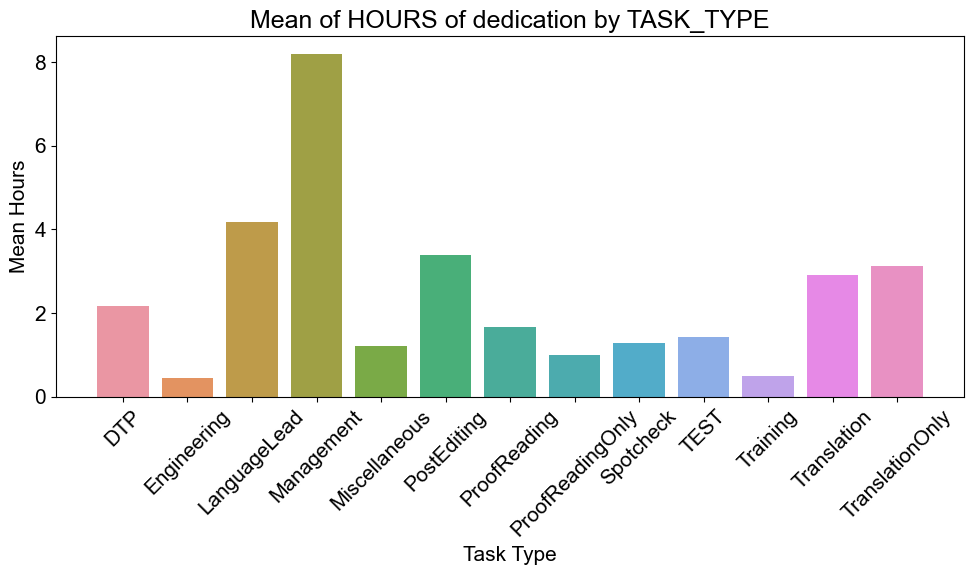

In [43]:
# Group by TASK_TYPE and calculate mean and std for the HOURS column
task_stats = data_df.groupby('TASK_TYPE')['FORECAST'].agg(['mean', 'std']).reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(
    x='TASK_TYPE', y='mean', data=task_stats, capsize=0.2, errorbar=None
)
plt.errorbar(
    x=range(len(task_stats['TASK_TYPE'])),
    y=task_stats['mean'],
    fmt='none',
    c='black',
    capsize=5
)

# Add labels and title
plt.title('Mean of HOURS of dedication by TASK_TYPE')
plt.xlabel('Task Type')
plt.ylabel('Mean Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
print(task_stats.to_string(index=False))

       TASK_TYPE     mean       std
             DTP 2.165321  3.703179
     Engineering 0.465098  1.909480
    LanguageLead 4.174252  9.658147
      Management 8.202894 16.978915
   Miscellaneous 1.207515  4.237821
     PostEditing 3.382495  8.542579
    ProofReading 1.663977  4.504995
ProofReadingOnly 0.991429  0.806255
       Spotcheck 1.295652  0.976747
            TEST 1.444146  1.277306
        Training 0.500000  0.000000
     Translation 2.923081  7.760209
 TranslationOnly 3.128889  2.617573


**General Experience of translators**

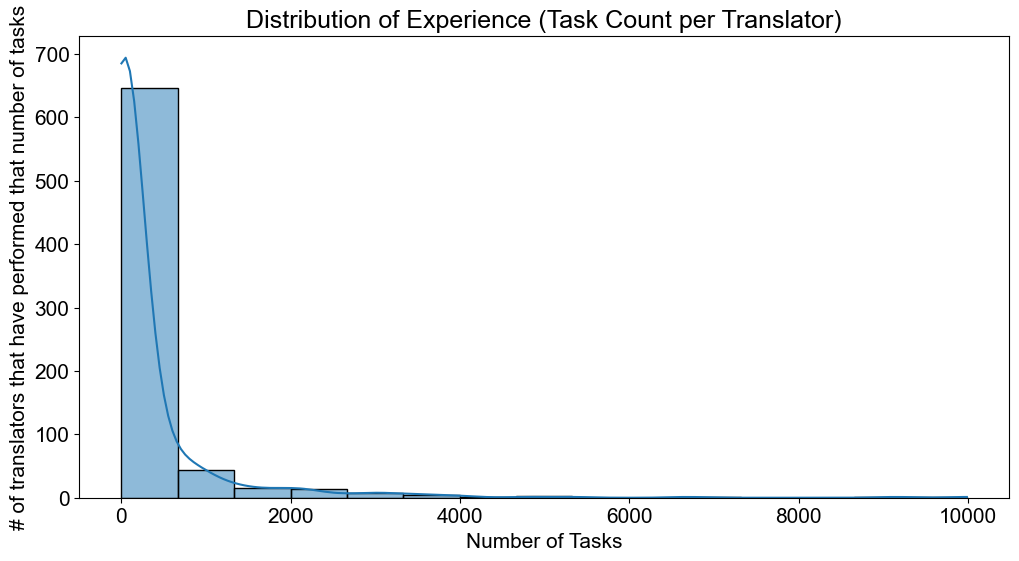

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/rimeslaoui/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/kp/xq5vblhn4kdbfk2chvxs1yl80000gn/T/ipykernel_25973/854337312.py", line 16, in <module>
    sns.barplot(x=top_experienced.values, y=top_experienced.index, palette='viridis', hue=top_experienced.index, legend=None)
  File "/Users/rimeslaoui/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py", line 2763, in barplot
  File "/Users/rimeslaoui/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py", line 1586, in plot
    _categorical_docs.update(_facet_docs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/rimeslaoui/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py", line 1569, in draw_bars
    barplot : Show point estimates and confidence intervals using bars.\
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

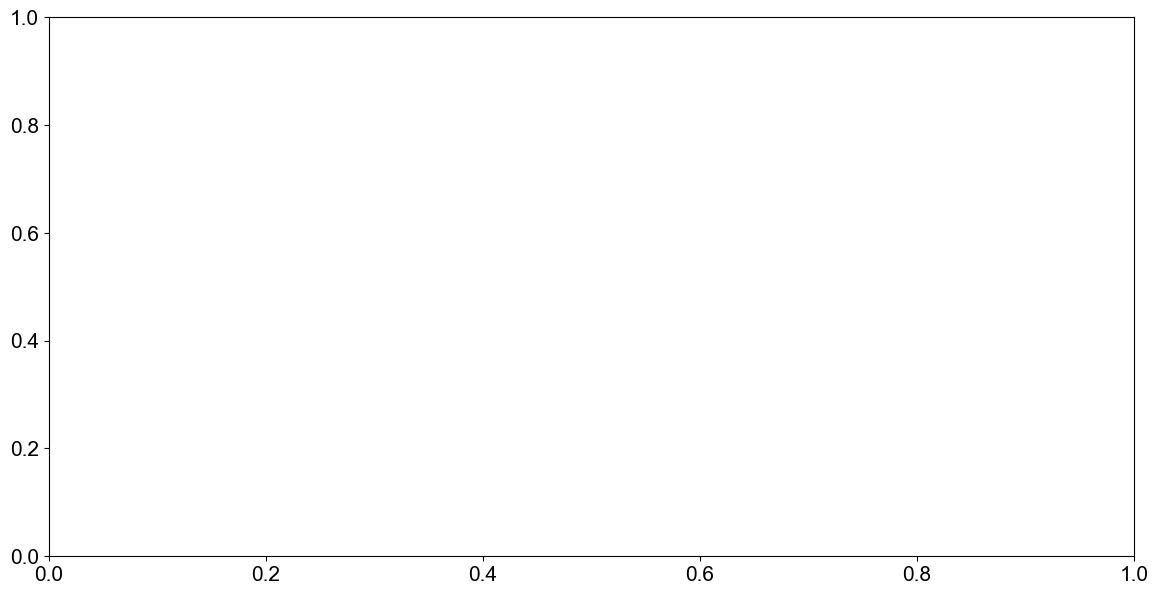

In [45]:
# Task count per translator
experience_counts = data_df.groupby('TRANSLATOR').size()

# Histogram of experience distribution
plt.figure(figsize=(12, 6))
sns.histplot(experience_counts, bins=15, kde=True)
plt.title('Distribution of Experience (Task Count per Translator)')
plt.xlabel('Number of Tasks')
plt.ylabel('# of translators that have performed that number of tasks')
plt.show()

# Bar plot of top 10 experienced translators
top_experienced = experience_counts.sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_experienced.values, y=top_experienced.index, palette='viridis', hue=top_experienced.index, legend=None)
plt.title('Top 20 Experienced Translators (By number of tasks)')
plt.xlabel('Number of Tasks')
plt.ylabel('Translator')
plt.show()


**Analysis of Task Types with Identical Source and Target Languages**

In [46]:
# Filter rows where origin language and target language are the same
same_language_rows = data_df[data_df['SOURCE_LANG'] == data_df['TARGET_LANG']]


num_same_language_rows = same_language_rows.shape[0]


print(f"Number of rows where the origin language and target language are the same: {num_same_language_rows}")
print(f"Percentage of rows where the origin language and target language are the same: {num_same_language_rows / data_df.shape[0] * 100:.2f}%")
# Display the task types for these rows
print("\nTask Types for rows where the origin language and target language are the same:")
display(same_language_rows['TASK_TYPE'].value_counts())


Number of rows where the origin language and target language are the same: 283
Percentage of rows where the origin language and target language are the same: 0.13%

Task Types for rows where the origin language and target language are the same:


TASK_TYPE
ProofReading     138
Translation       68
Engineering       39
Miscellaneous     38
Name: count, dtype: int64

**How often a translator was assigned the same sector and subindustry**

This code tells us versatility of translators (in how many industries each translator has worked)

In [47]:
# Check unique sectors per translator
translator_sector_counts = data_df.groupby('TRANSLATOR')['MANUFACTURER_SECTOR'].nunique()
print("\nUnique Sectors per Translator:\n", translator_sector_counts)
translators_more_than_sectors = translator_sector_counts[translator_sector_counts > 1]
print(f"\nNumber of translators with more than 1 unique sectors: {translators_more_than_sectors.shape[0]}")

# Check unique subindustry per translator
translator_subsector_counts = data_df.groupby('TRANSLATOR')['MANUFACTURER_SUBINDUSTRY'].nunique()
print("\nUnique Subindustry per Translator:\n", translator_subsector_counts)
translators_more_than_subindustries = translator_subsector_counts[translator_subsector_counts > 1]
print(f"\nNumber of translators with more than 1 unique subindustries: {translators_more_than_subindustries.shape[0]}")


Unique Sectors per Translator:
 TRANSLATOR
Aaron                  1
Abdon                  2
Abdon Isaias          11
Abel Irene             1
Abelardo              19
                      ..
Yumi                   3
Zacarias Casio         9
Zacarias Marcelino     4
Zachary                3
Zlatan                 2
Name: MANUFACTURER_SECTOR, Length: 736, dtype: int64

Number of translators with more than 1 unique sectors: 525

Unique Subindustry per Translator:
 TRANSLATOR
Aaron                  1
Abdon                  2
Abdon Isaias          48
Abel Irene             1
Abelardo              91
                      ..
Yumi                   6
Zacarias Casio        22
Zacarias Marcelino     5
Zachary                4
Zlatan                 2
Name: MANUFACTURER_SUBINDUSTRY, Length: 736, dtype: int64

Number of translators with more than 1 unique subindustries: 550


There is arround 200 translators that only work for one specific sector

In [48]:
# Filter translators who work for only one unique sector
translators_one_sector = translator_sector_counts[translator_sector_counts == 1]
translators_one_sector_names = translators_one_sector.index
print(f"\nTranslators working for only one sector: {translators_one_sector_names.tolist()}")

# Filter translators who work for only one unique subindustry
translators_one_subsector = translator_subsector_counts[translator_subsector_counts == 1]
translators_one_subsector_names = translators_one_subsector.index
print(f"\nTranslators working for only one subindustry: {translators_one_subsector_names.tolist()}")


Translators working for only one sector: ['Aaron', 'Abel Irene', 'Abril', 'Adam', 'Adan', 'Adela', 'Adela Esteban', 'Adrien', 'Ager', 'Agustina Greta', 'Aisha', 'Alba', 'Alejandria Itzel', 'Alejandria Leon', 'Alexandra', 'Alexia Fernanda', 'Alfonso Odon', 'Amancio', 'Amaru', 'Ana Belen', 'Ana Flavia', 'Ana Jimena', 'Ana Lilia', 'Ana Lucia', 'Andreas', 'Andres', 'Andris', 'Angel', 'Antonia', 'Anxo', 'Arami', 'Arcadio', 'Aresio Casimiro', 'Ariadna Lino', 'Aritza', 'Arnau', 'Arthur', 'Athenea', 'Audrey', 'Aymara', 'Balduino Agueda', 'Bartosz', 'Beltran', 'Beltran Adrian', 'Bernarda Romualdo', 'Blanca Columbano', 'Brigitte', 'Bruna', 'Candida Benedicto', 'Carlos Antonio', 'Casiano Honorio', 'Cassia', 'Catalina', 'Catarina', 'Celina', 'Cirino', 'Ciro', 'Ciro Cesareo', 'Clara', 'Cleofas Irene', 'Columba Teofanes', 'Conchi', 'Corinne', 'Daan', 'Daciano', 'Damian Roman', 'Declan', 'Demetra', 'Democrito', 'Dominique', 'Donato', 'Edilson', 'Efren Priscila', 'Elene', 'Eleonore', 'Elias', 'Elixab

This tells us how many times a Traslator has been assigned to a task of the same sector and subsector

In [49]:
# Coun how many times the combination of TRANSLATOR, MANUFACTURER_SECTOR, and MANUFACTURER_SUBINDUSTRY is repeated in the dataset
pair_counts = (
    data_df
    .groupby(['TRANSLATOR', 'MANUFACTURER_SECTOR', 'MANUFACTURER_SUBINDUSTRY'])
    .size()
    .reset_index(name='COUNT')
)

pair_counts_sorted = pair_counts.sort_values(by='COUNT', ascending=False)

# Drop rows where COUNT is less than 100
pair_counts_sorted_filtered = pair_counts_sorted[pair_counts_sorted['COUNT'] >= 1000]

# Display the filtered table
display(pair_counts_sorted_filtered)

print(f"\nNumber of unique translator-sector-subindustry combinations with more than 1000 tasks: {pair_counts_sorted_filtered.shape[0]}")

,TRANSLATOR,MANUFACTURER_SECTOR,MANUFACTURER_SUBINDUSTRY,COUNT
2142,Casiano,Communication Services,Internet Services & Infrastructure,9112
9684,Xoana,Communication Services,Internet Services & Infrastructure,5894
7419,Nieves Leocadia,Communication Services,Internet Services & Infrastructure,4791
4897,Isaias Venancio,Communication Services,Internet Services & Infrastructure,4089
1406,Ariadna Laurina,Information Technology,"Technology Hardware, Storage & Peripherals",3192
6164,Lucano,Communication Services,Internet Services & Infrastructure,3072
225,Acacio Poncio,Information Technology,Systems Software,2946
279,Agueda,Communication Services,Internet Services & Infrastructure,2813
1268,Anselma Daciano,Communication Services,Internet Services & Infrastructure,2806
2238,Celso,Information Technology,Systems Software,2733



Number of unique translator-sector-subindustry combinations with more than 1000 tasks: 30


**How often a translator was assigned the same client**

In [50]:
# Coun how many times the combination of TRANSLATOR, MANUFACTURER (Client) is repeated in the dataset
pair_counts = (
    data_df
    .groupby(['TRANSLATOR', 'MANUFACTURER'])
    .size()
    .reset_index(name='COUNT')
)

pair_counts_sorted = pair_counts.sort_values(by='COUNT', ascending=False)

# Drop rows where COUNT is less than 1000
pair_counts_sorted_filtered = pair_counts_sorted[pair_counts_sorted['COUNT'] >= 1000]

# Display the filtered table
display(pair_counts_sorted_filtered)

print(f"\nNumber of unique translator-client combinations with more than 1000 tasks: {pair_counts_sorted_filtered.shape[0]}")

,TRANSLATOR,MANUFACTURER,COUNT
3573,Casiano,TrueConnect,9112
15741,Xoana,TrueConnect,5894
11892,Nieves Leocadia,TrueConnect,4791
7756,Isaias Venancio,TrueConnect,4089
2269,Ariadna Laurina,FrontierTech,3156
9816,Lucano,TrueConnect,3072
382,Acacio Poncio,AeroSysTech,2924
554,Agueda,TrueConnect,2813
2152,Anselma Daciano,TrueConnect,2806
3644,Celso,AeroSysTech,2732



Number of unique translator-client combinations with more than 1000 tasks: 27


In [51]:
# Check unique clients per translator
translator_client_counts = data_df.groupby('TRANSLATOR')['MANUFACTURER'].nunique()
translators_one_client = translator_client_counts[translator_client_counts == 1]
print(f"\nNumber of translators that only works with one specific client: {translators_one_client.shape[0]}")


Number of translators that only works with one specific client: 184


In [52]:
## TODO Check if translators that work for a specific client are also working for a specific sector

**Multitasking**

Translators that do multitasking

In [53]:
df_multitask = data_df[['TRANSLATOR', 'TASK_ID', 'WORKING', 'DELIVERED']]

df_multitask = df_multitask.sort_values(by=['TRANSLATOR', 'WORKING'])


# Initialize a dictionary to count overlaps for each translator
overlap_count = defaultdict(int)

for translator, group in df_multitask.groupby('TRANSLATOR'):
    end_prev = pd.Timestamp.min
    for _, row in group.iterrows():
        start = row['WORKING']
        end = row['DELIVERED']
        if start < end_prev:
            overlap_count[translator] += 1
        end_prev = max(end_prev, end)

multitasking_df = pd.DataFrame(list(overlap_count.items()), columns=['TRANSLATOR', 'OVERLAPPING_TASKS'])
multitasking_df = multitasking_df.sort_values(by='OVERLAPPING_TASKS', ascending=False)

display(multitasking_df.head(10))

,TRANSLATOR,OVERLAPPING_TASKS
468,Xoana,9390
119,Casiano,6746
371,Nieves Leocadia,3513
70,Ariadna Laurina,2666
5,Acacio Poncio,2539
197,Felipe Aldana,2514
30,Almudena Fiamma,2481
249,Isaias Venancio,2337
436,Severino,2013
143,Columbano Cleofas,1686


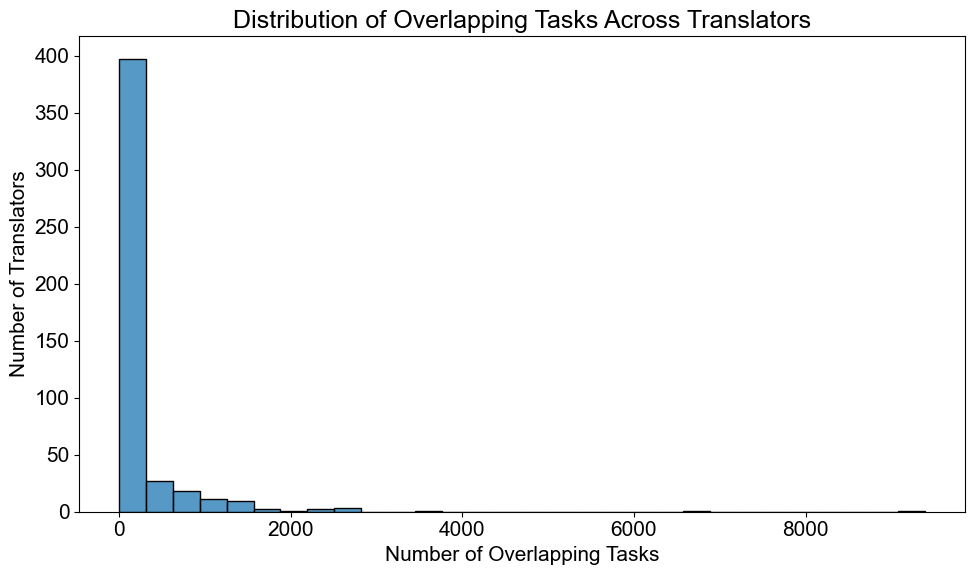

In [66]:
# Histogram of multitasking distribution in translators

plt.figure(figsize=(10, 6))
sns.histplot(multitasking_df['OVERLAPPING_TASKS'], bins=30, kde=False)
plt.title('Distribution of Overlapping Tasks Across Translators')
plt.xlabel('Number of Overlapping Tasks')
plt.ylabel('Number of Translators')
plt.tight_layout()
plt.show()


 Which task types overlap most often

In [54]:
task_overlap = Counter()

for translator, group in data_df.groupby('TRANSLATOR'):
    end_prev = pd.Timestamp.min
    task_prev = None
    for _, row in group.iterrows():
        start, end = row['WORKING'], row['DELIVERED']
        task_type = row['TASK_TYPE']
        if pd.notnull(start) and pd.notnull(end):
            if start < end_prev:
                task_overlap[task_type] += 1
            end_prev = max(end_prev, end)

task_overlap_df = pd.DataFrame(task_overlap.items(), columns=['TASK_TYPE', 'OVERLAPS']).sort_values(by='OVERLAPS', ascending=False)

display(task_overlap_df.head(10))

,TASK_TYPE,OVERLAPS
0,Translation,78324
1,ProofReading,43872
2,Miscellaneous,16501
4,PostEditing,12652
8,LanguageLead,683
7,Engineering,623
3,Management,296
6,DTP,125
5,TEST,49
10,Spotcheck,13


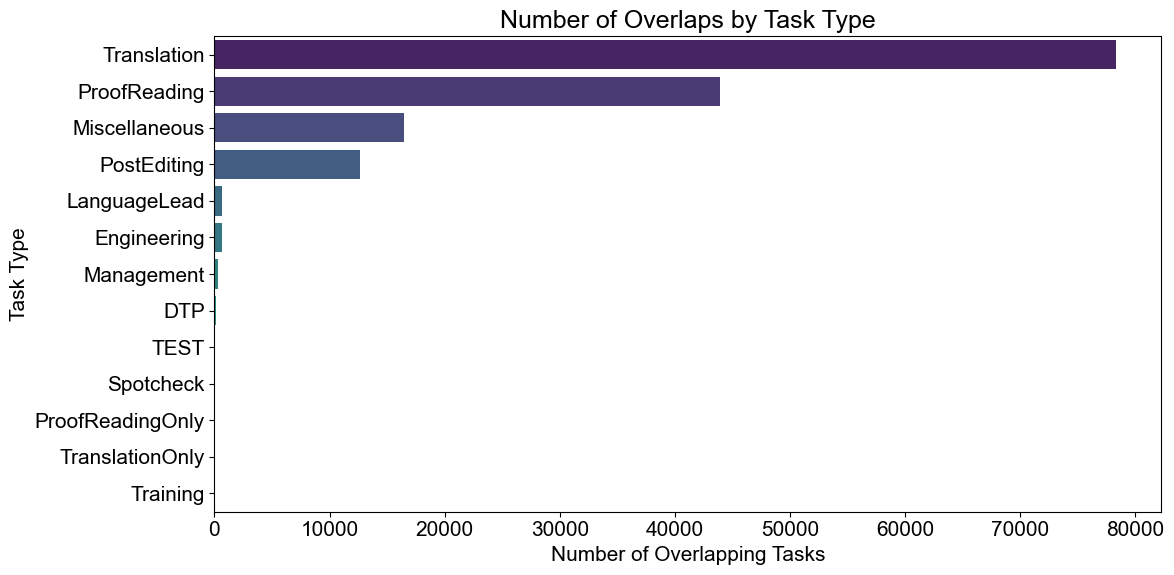

In [67]:
# Bar chart of task type overlaps

plt.figure(figsize=(12, 6))
sns.barplot(x='OVERLAPS', y='TASK_TYPE', data=task_overlap_df, palette='viridis')
plt.title('Number of Overlaps by Task Type')
plt.xlabel('Number of Overlapping Tasks')
plt.ylabel('Task Type')
plt.tight_layout()
plt.show()


Correlate multitasking with experience, delay, and quality

In [55]:
# Experience: total number of tasks per translator
experience = data_df.groupby('TRANSLATOR').size().rename('TASK_COUNT')

# Delay: CLOSE - END (theoretical end)
data_df['DELAY_HOURS'] = (pd.to_datetime(data_df['CLOSE']) - pd.to_datetime(data_df['END'])).dt.total_seconds() / 3600

avg_delay = data_df.groupby('TRANSLATOR')['DELAY_HOURS'].mean().rename('AVG_DELAY_HOURS')
avg_quality = data_df.groupby('TRANSLATOR')['QUALITY_EVALUATION'].mean().rename('AVG_QUALITY')

# Merge everything
correlation_df = multitasking_df.set_index('TRANSLATOR') \
    .join([experience, avg_delay, avg_quality])

correlation_df = correlation_df.fillna(0)
display(correlation_df.corr())

,OVERLAPPING_TASKS,TASK_COUNT,AVG_DELAY_HOURS,AVG_QUALITY
OVERLAPPING_TASKS,1.000000,0.928551,-0.056966,0.023187
TASK_COUNT,0.928551,1.000000,-0.070955,0.034020
AVG_DELAY_HOURS,-0.056966,-0.070955,1.000000,0.050355
AVG_QUALITY,0.023187,0.034020,0.050355,1.000000


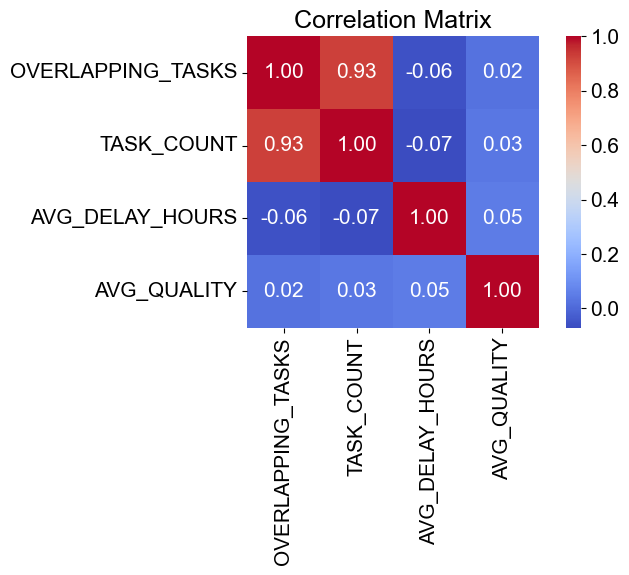

In [64]:
# Plot heatmap 

corr = correlation_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


Detect which task types overlap together, and count how often they overlap

In [ ]:
# Multitasked task pairs and overlap durations
pair_counter = Counter()
overlap_durations = []

# Group by translator
for translator, group in data_df.groupby('TRANSLATOR'):
    group = group.sort_values(by='WORKING')
    tasks = []
    
    for _, row in group.iterrows():
        tasks.append((row['WORKING'], row['DELIVERED'], row['TASK_TYPE']))
    
    # Compare consecutive tasks
    for i in range(len(tasks) - 1):
        start1, end1, type1 = tasks[i]
        start2, end2, type2 = tasks[i+1]
        
        if pd.notnull(start1) and pd.notnull(end1) and pd.notnull(start2) and pd.notnull(end2):
            if start2 < end1:
                pair = tuple(sorted([type1, type2]))
                pair_counter[pair] += 1
                overlap_duration = (end1 - start2).total_seconds() / 3600
                if overlap_duration > 0:
                    overlap_durations.append(overlap_duration)

# Convert pair_counter to dataframe
task_pair_df = pd.DataFrame(pair_counter.items(), columns=['TASK_PAIR', 'COUNT']).sort_values(by='COUNT', ascending=False)

display(task_pair_df.head(10))


,TASK_PAIR,COUNT
1,"(Translation, Translation)",23572
4,"(ProofReading, ProofReading)",10415
2,"(ProofReading, Translation)",9941
0,"(Miscellaneous, Translation)",3856
3,"(Miscellaneous, ProofReading)",2736
10,"(PostEditing, Translation)",2302
11,"(PostEditing, PostEditing)",2008
7,"(Miscellaneous, Miscellaneous)",1652
8,"(PostEditing, ProofReading)",883
9,"(Miscellaneous, PostEditing)",628


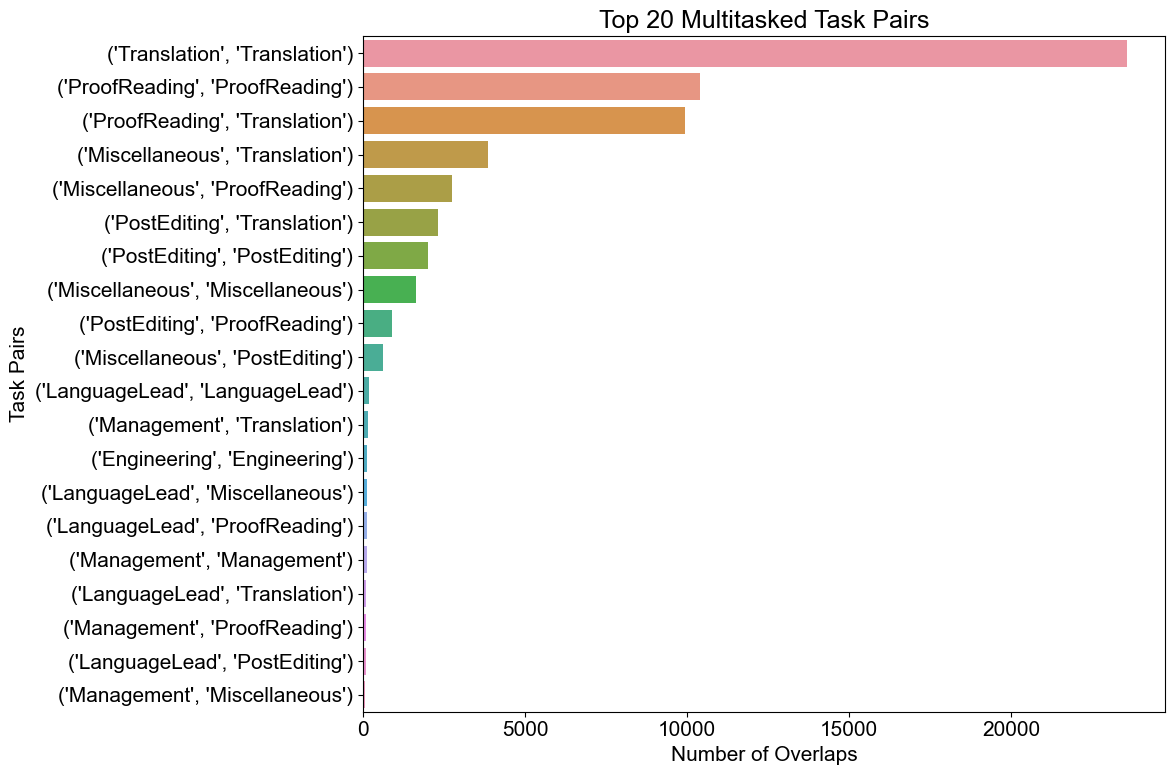

In [59]:
# Plot top multitasked task pairs


plt.figure(figsize=(12, 8))
sns.barplot(x='COUNT', y='TASK_PAIR', data=task_pair_df.head(20))
plt.title('Top 20 Multitasked Task Pairs')
plt.xlabel('Number of Overlaps')
plt.ylabel('Task Pairs')
plt.tight_layout()
plt.show()


This plot shows how the number of tasks a translator has completed (experience) relates to how often they multitask (overlapping tasks)

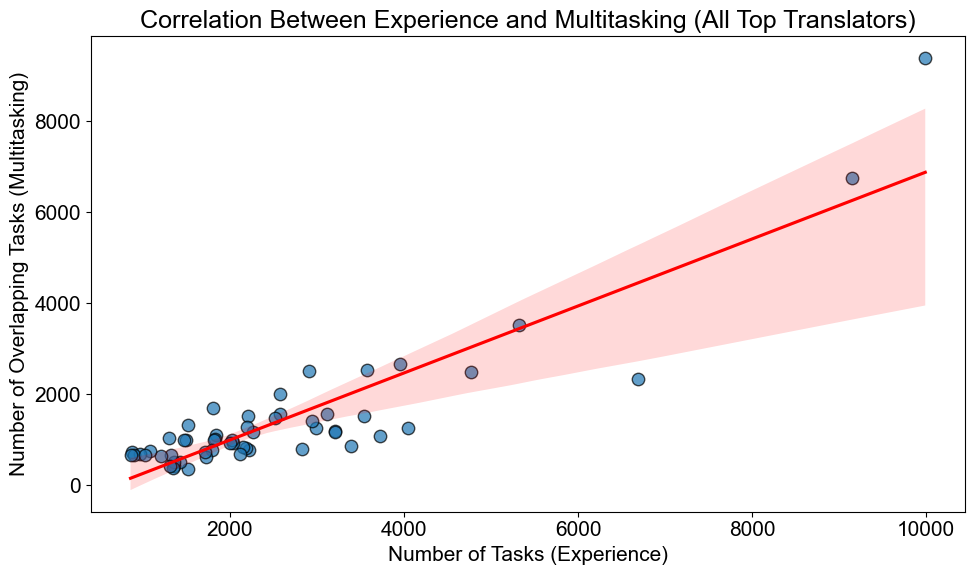

In [70]:
#  Top translators

plt.figure(figsize=(10, 6))
sns.regplot(
    x='TASK_COUNT',
    y='OVERLAPPING_TASKS',
    data=top_combined,
    scatter_kws={'s':80, 'alpha':0.7, 'edgecolor':'k'},
    line_kws={'color':'red'}
)

plt.title('Correlation Between Experience and Multitasking (All Top Translators)')
plt.xlabel('Number of Tasks (Experience)')
plt.ylabel('Number of Overlapping Tasks (Multitasking)')
plt.tight_layout()
plt.show()


Calculate and plot overlap durations distribution

In [86]:
# Calculate and plot overlap durations in hours

overlap_durations = []

for translator, group in data_df.groupby('TRANSLATOR'):
    group = group.sort_values(by='WORKING')
    tasks = []
    
    for _, row in group.iterrows():
        tasks.append((row['WORKING'], row['DELIVERED'], row['TASK_TYPE']))
    
    for i in range(len(tasks) - 1):
        start1, end1, type1 = tasks[i]
        start2, end2, type2 = tasks[i+1]
        
        if pd.notnull(start1) and pd.notnull(end1) and pd.notnull(start2) and pd.notnull(end2):
            overlap_start = max(start1, start2)
            overlap_end = min(end1, end2)
            if overlap_start < overlap_end:
                overlap_duration_hours = (overlap_end - overlap_start).total_seconds() / 3600
                if overlap_duration_hours > 0:
                    overlap_durations.append(overlap_duration_hours)


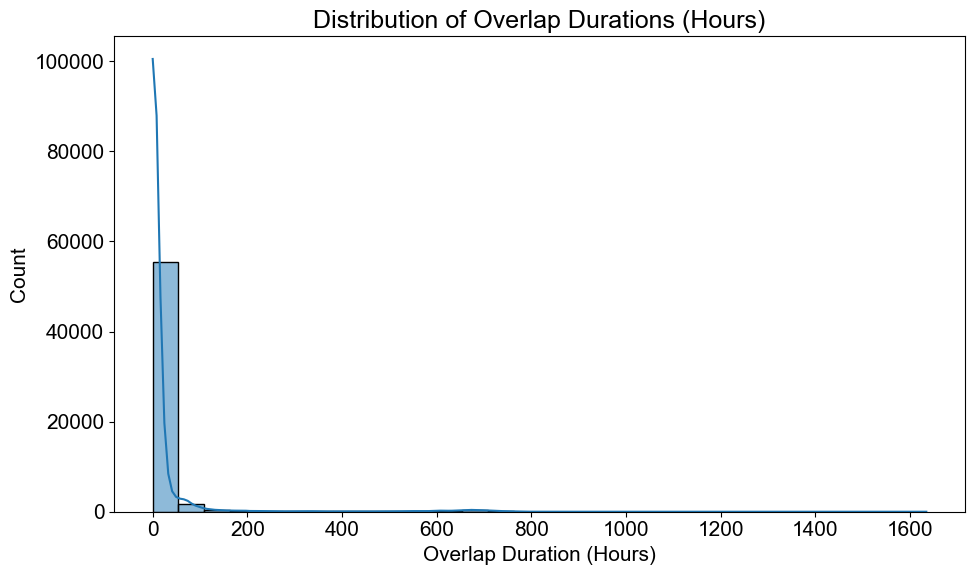

Average overlap duration: 22.53 hours


In [87]:


plt.figure(figsize=(10, 6))
sns.histplot(overlap_durations, bins=30, kde=True)
plt.title('Distribution of Overlap Durations (Hours)')
plt.xlabel('Overlap Duration (Hours)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Print average Overlap duration
print(f"Average overlap duration: {np.mean(overlap_durations):.2f} hours")



Calculate Average Overlap Duration per Translator in DAYS

In [79]:

from collections import defaultdict

translator_overlap_durations = defaultdict(list)

# Group by translator
for translator, group in data_df.groupby('TRANSLATOR'):
    group = group.sort_values(by='WORKING')
    tasks = []
    
    for _, row in group.iterrows():
        tasks.append((row['WORKING'], row['DELIVERED'], row['TASK_TYPE']))
    
    for i in range(len(tasks) - 1):
        start1, end1, type1 = tasks[i]
        start2, end2, type2 = tasks[i+1]
        
        if pd.notnull(start1) and pd.notnull(end1) and pd.notnull(start2) and pd.notnull(end2):
            overlap_start = max(start1, start2)
            overlap_end = min(end1, end2)
            if overlap_start < overlap_end:
                overlap_duration_days = (overlap_end - overlap_start).total_seconds() / (3600 * 24)
                if overlap_duration_days > 0:
                    translator_overlap_durations[translator].append(overlap_duration_days)

# Dataframe
avg_overlap_duration_df = pd.DataFrame({
    'TRANSLATOR': list(translator_overlap_durations.keys()),
    'AVG_OVERLAP_DURATION_DAYS': [np.mean(durations) for durations in translator_overlap_durations.values()]
})

display(avg_overlap_duration_df.sort_values(by='AVG_OVERLAP_DURATION_DAYS', ascending=False).head(10))


,TRANSLATOR,AVG_OVERLAP_DURATION_DAYS
467,William,28.303137
32,Amalia,21.888912
288,Kenti,14.312111
57,Andreu,13.690927
139,Claudio,10.949976
441,Sophie,10.893277
110,Bram,10.148588
191,Evaristo,9.842434
399,Philipp,8.999832
323,Maite Usula,8.837146


Plot top translators with longest average Multitasking duration

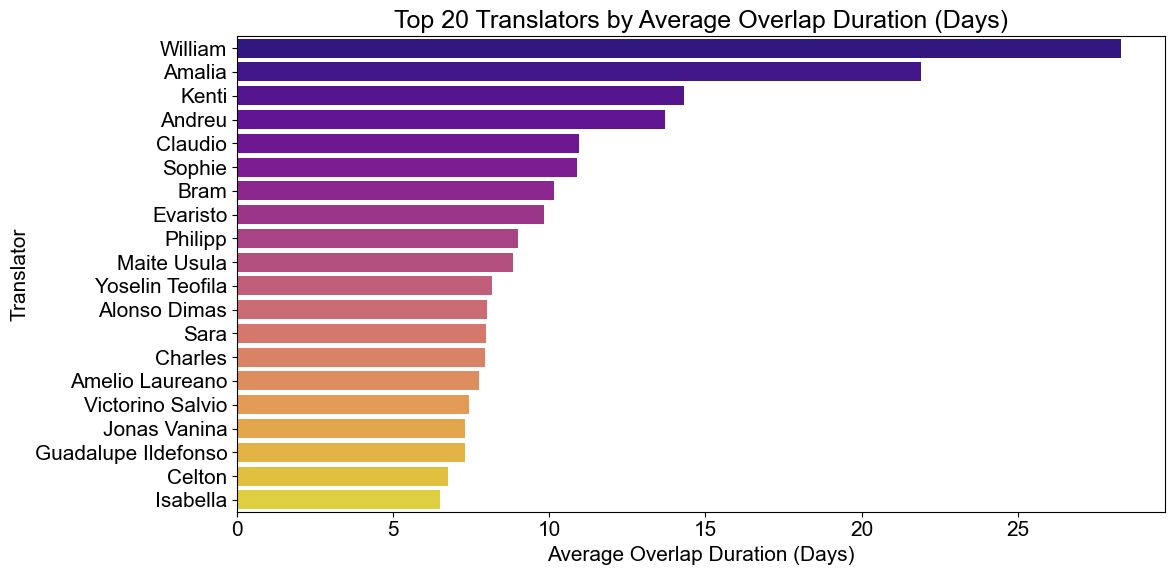

In [80]:

top_avg_overlap = avg_overlap_duration_df.sort_values(by='AVG_OVERLAP_DURATION_DAYS', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='AVG_OVERLAP_DURATION_DAYS', y='TRANSLATOR', data=top_avg_overlap, palette='plasma')
plt.title('Top 20 Translators by Average Overlap Duration (Days)')
plt.xlabel('Average Overlap Duration (Days)')
plt.ylabel('Translator')
plt.tight_layout()
plt.show()




Who spends a lot of time multitasking (density close to 1 = multitasking almost all time) out of his work time

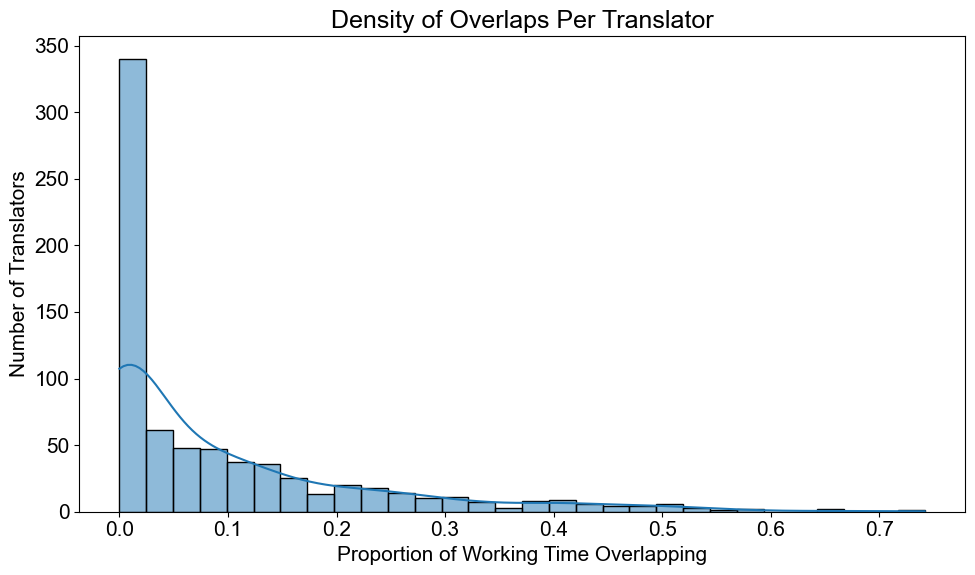

,TRANSLATOR,TOTAL_WORK_HOURS,TOTAL_OVERLAP_HOURS,OVERLAP_DENSITY
53,Alonso Dimas,10623.818333,7881.375833,0.741859
592,Noela,31.436389,20.831111,0.662643
724,Wei,856.860278,565.063056,0.659458
229,Dacio Abel,61660.726111,35860.035278,0.581570
716,Victorino Salvio,122775.956389,71304.548056,0.580770
258,Edmundo,125597.395556,70347.030000,0.560099
359,Guzman,3244.651667,1746.742778,0.538345
92,Andreu,7989.083889,4271.569167,0.534676
256,Dylan,1739.935556,927.199167,0.532893
673,Sara,53314.607778,27389.400556,0.513732


In [88]:
# Density of overlaps per translator

translator_total_time = defaultdict(float)
translator_overlap_time = defaultdict(float)

for translator, group in data_df.groupby('TRANSLATOR'):
    group = group.sort_values(by='WORKING')
    tasks = []
    
    for _, row in group.iterrows():
        start, end, task = row['WORKING'], row['DELIVERED'], row['TASK_TYPE']
        if pd.notnull(start) and pd.notnull(end):
            tasks.append((start, end))
            translator_total_time[translator] += (end - start).total_seconds() / 3600  # in hours
    
    for i in range(len(tasks) - 1):
        start1, end1 = tasks[i]
        start2, end2 = tasks[i+1]
        
        if pd.notnull(start1) and pd.notnull(end1) and pd.notnull(start2) and pd.notnull(end2):
            overlap_start = max(start1, start2)
            overlap_end = min(end1, end2)
            if overlap_start < overlap_end:
                overlap_duration = (overlap_end - overlap_start).total_seconds() / 3600
                if overlap_duration > 0:
                    translator_overlap_time[translator] += overlap_duration

# Create dataframe
density_df = pd.DataFrame({
    'TRANSLATOR': list(translator_total_time.keys()),
    'TOTAL_WORK_HOURS': list(translator_total_time.values()),
    'TOTAL_OVERLAP_HOURS': [translator_overlap_time[t] for t in translator_total_time.keys()]
})

density_df['OVERLAP_DENSITY'] = density_df['TOTAL_OVERLAP_HOURS'] / density_df['TOTAL_WORK_HOURS']

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(density_df['OVERLAP_DENSITY'], bins=30, kde=True)
plt.title('Density of Overlaps Per Translator')
plt.xlabel('Proportion of Working Time Overlapping')
plt.ylabel('Number of Translators')
plt.tight_layout()
plt.show()

display(density_df.sort_values(by='OVERLAP_DENSITY', ascending=False).head(10))


Are translators multitasking more on certain days ?

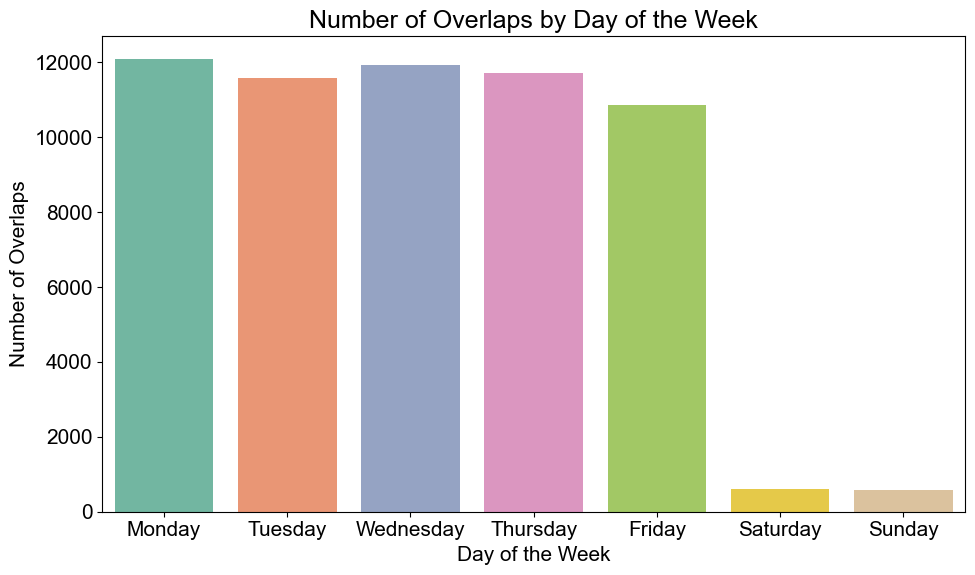

In [91]:
# Multitasking Overlaps by Day of Week

overlaps_by_weekday = defaultdict(int)

for translator, group in data_df.groupby('TRANSLATOR'):
    group = group.sort_values(by='WORKING')
    tasks = []
    
    for _, row in group.iterrows():
        start, end, task = row['WORKING'], row['DELIVERED'], row['TASK_TYPE']
        if pd.notnull(start) and pd.notnull(end):
            tasks.append((start, end))
    
    for i in range(len(tasks) - 1):
        start1, end1 = tasks[i]
        start2, end2 = tasks[i+1]
        
        if pd.notnull(start1) and pd.notnull(end1) and pd.notnull(start2) and pd.notnull(end2):
            overlap_start = max(start1, start2)
            overlap_end = min(end1, end2)
            if overlap_start < overlap_end:
                weekday = overlap_start.weekday()  
                overlaps_by_weekday[weekday] += 1

weekday_df = pd.DataFrame({
    'Weekday': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'Overlaps': [overlaps_by_weekday[i] for i in range(7)]
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Weekday', y='Overlaps', data=weekday_df, palette='Set2')
plt.title('Number of Overlaps by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Overlaps')
plt.tight_layout()
plt.show()


**Experience by Sector**

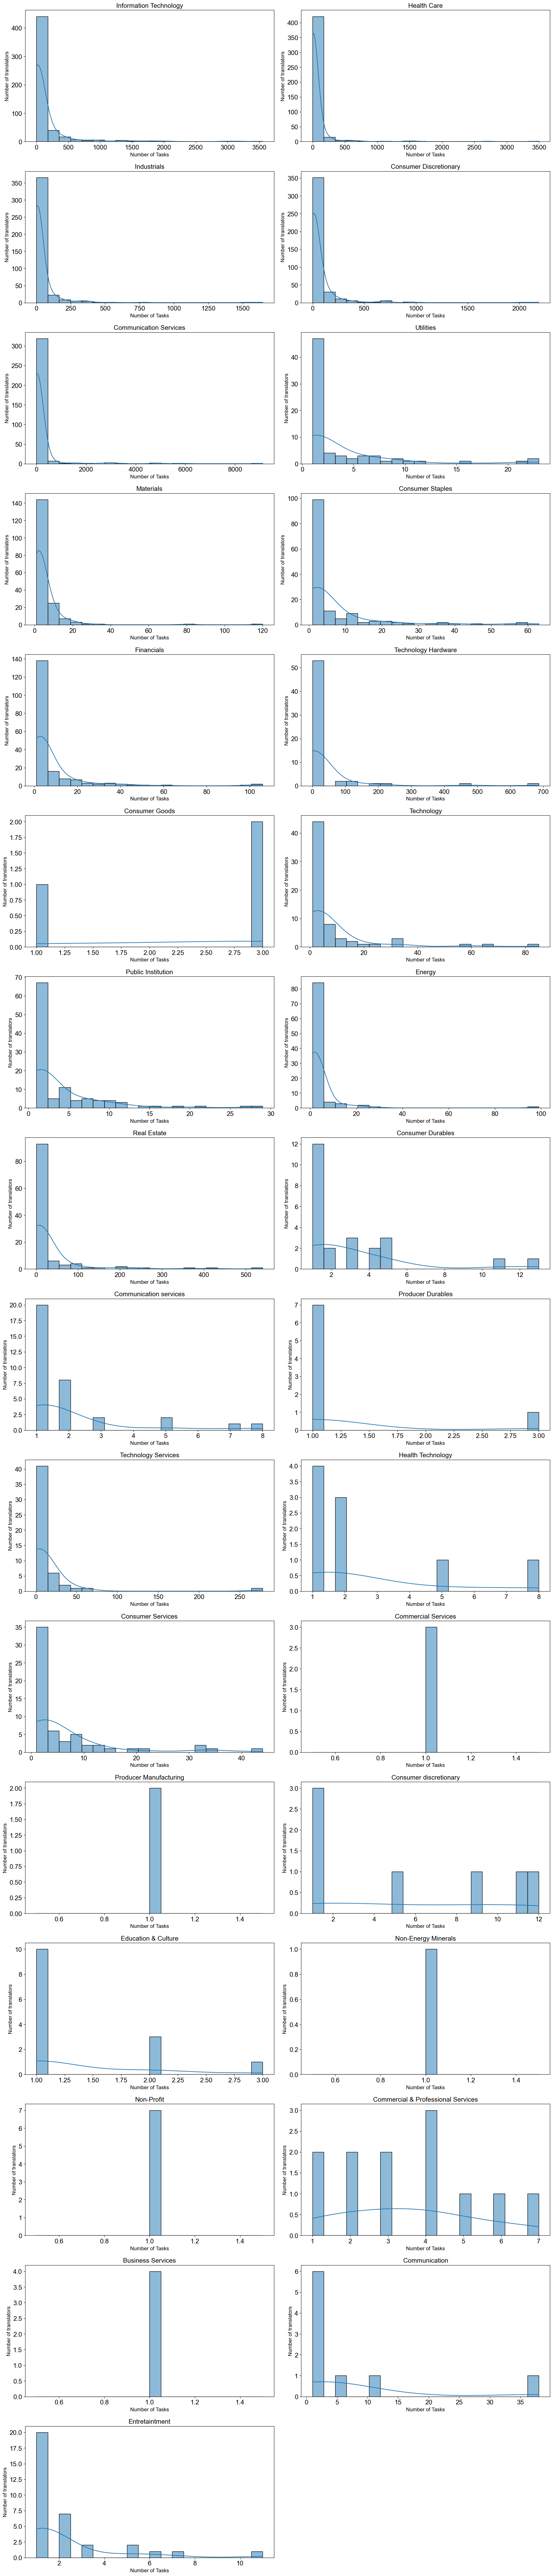

In [81]:
sector_cols = data_df['MANUFACTURER_SECTOR'].unique()
sector_cols = [col for col in sector_cols if pd.notnull(col)]  # Remove NaN values
fig, axes = plt.subplots(18, 2, figsize=(18, 3 * len(sector_cols)))
axes = axes.flatten()

# Loop through each task type and plot the histogram in the appropriate subplot
for i, task_type in enumerate(sector_cols):
    # Filter data for the current task type
    sector_data = data_df[data_df['MANUFACTURER_SECTOR'] == task_type]
    
    # Get the task counts per translator for this task type
    experience_counts = sector_data.groupby('TRANSLATOR').size()

    sns.histplot(experience_counts, bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'{task_type}', fontsize=15)
    axes[i].set_xlabel('Number of Tasks', fontsize=12)
    axes[i].set_ylabel('Number of translators', fontsize=12)

for j in range(len(sector_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

**Experience by Task Type**

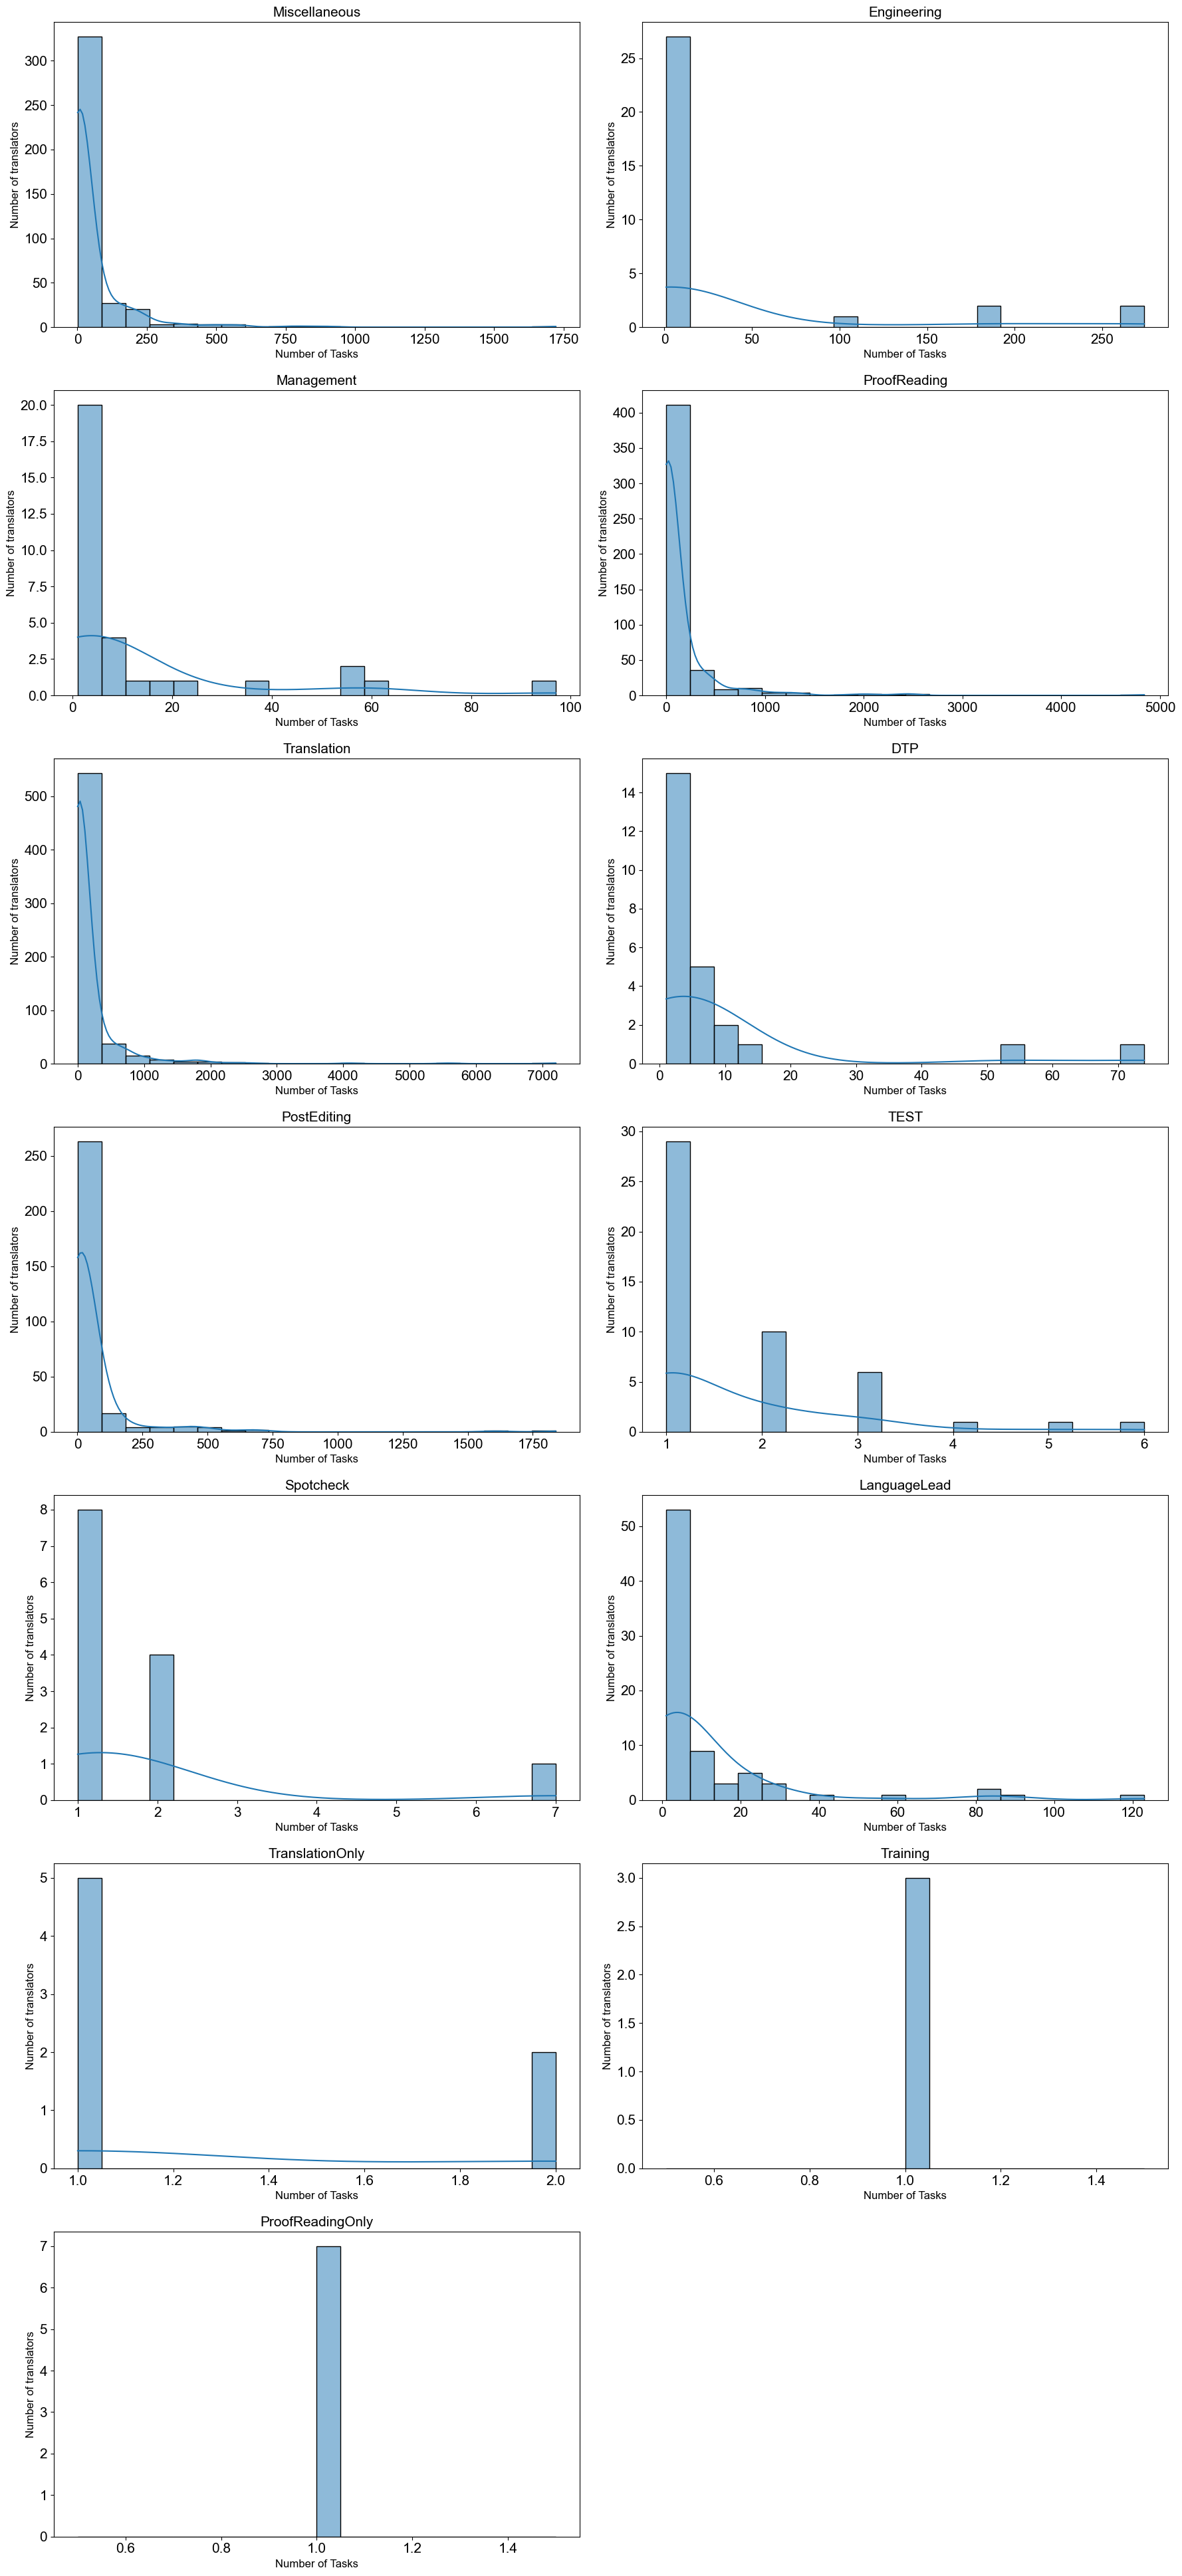

In [82]:
task_types = data_df['TASK_TYPE'].unique()

# Set up the figure with a grid layout
fig, axes = plt.subplots(7, 2, figsize=(18, 3 * len(task_types)))
# Flatten the axes array to easily index it
axes = axes.flatten()

# Loop through each task type and plot the histogram in the appropriate subplot
for i, task_type in enumerate(task_types):
    # Filter data for the current task type
    task_data = data_df[data_df['TASK_TYPE'] == task_type]
    
    # Get the task counts per translator for this task type
    experience_counts = task_data.groupby('TRANSLATOR').size()

    sns.histplot(experience_counts, bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'{task_type}', fontsize=15)
    axes[i].set_xlabel('Number of Tasks', fontsize=12)
    axes[i].set_ylabel('Number of translators', fontsize=12)

for j in range(len(task_types), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Total working hours per translator distribution(another type of experience metric)

In [89]:

translator_work_hours = defaultdict(float)

for _, row in data_df.iterrows():
    start = row['WORKING']
    end = row['DELIVERED']
    translator = row['TRANSLATOR']
    
    if pd.notnull(start) and pd.notnull(end):
        duration_hours = (end - start).total_seconds() / 3600  # in hours
        if duration_hours > 0:
            translator_work_hours[translator] += duration_hours

total_work_hours_df = pd.DataFrame({
    'TRANSLATOR': list(translator_work_hours.keys()),
    'TOTAL_WORK_HOURS': list(translator_work_hours.values())
})

# Display Top 10
display(total_work_hours_df.sort_values(by='TOTAL_WORK_HOURS', ascending=False).head(10))


,TRANSLATOR,TOTAL_WORK_HOURS
86,Xoana,221187.289722
9,Almudena Fiamma,134897.067500
359,Edmundo,125597.395556
342,Victorino Salvio,122775.956389
15,Ariadna Laurina,116751.062778
163,Laurina Rafael,103012.062222
7,Severino,102896.935833
275,Heraclio,96592.692778
361,Esiquio,94554.369722
85,Ryan,90984.375000


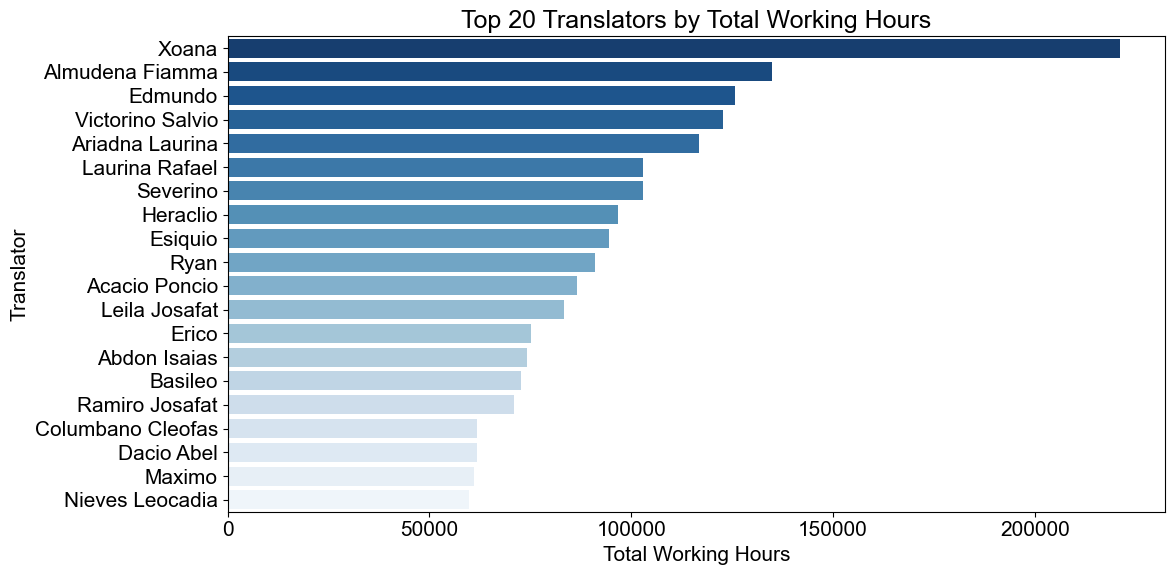

In [90]:
# Plot Top 20 Translators by Total Working Hours

top_working = total_work_hours_df.sort_values(by='TOTAL_WORK_HOURS', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='TOTAL_WORK_HOURS', y='TRANSLATOR', data=top_working, palette='Blues_r')
plt.title('Top 20 Translators by Total Working Hours')
plt.xlabel('Total Working Hours')
plt.ylabel('Translator')
plt.tight_layout()
plt.show()


Let's see what day of the week is the load heavier 

In [98]:

weekday_hours = defaultdict(float)

for _, row in data_df.iterrows():
    start = row['WORKING']
    end = row['DELIVERED']
    
    if pd.notnull(start) and pd.notnull(end):
        duration_hours = (end - start).total_seconds() / 3600
        if duration_hours > 0:
            weekday = start.strftime('%A')  
            weekday_hours[weekday] += duration_hours

# Create DataFrame
weekday_hours_df = pd.DataFrame({
    'Weekday': list(weekday_hours.keys()),
    'Total_Hours': list(weekday_hours.values())
})

# Order weekdays correctly
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_hours_df['Weekday'] = pd.Categorical(weekday_hours_df['Weekday'], categories=weekday_order, ordered=True)
weekday_hours_df = weekday_hours_df.sort_values('Weekday')


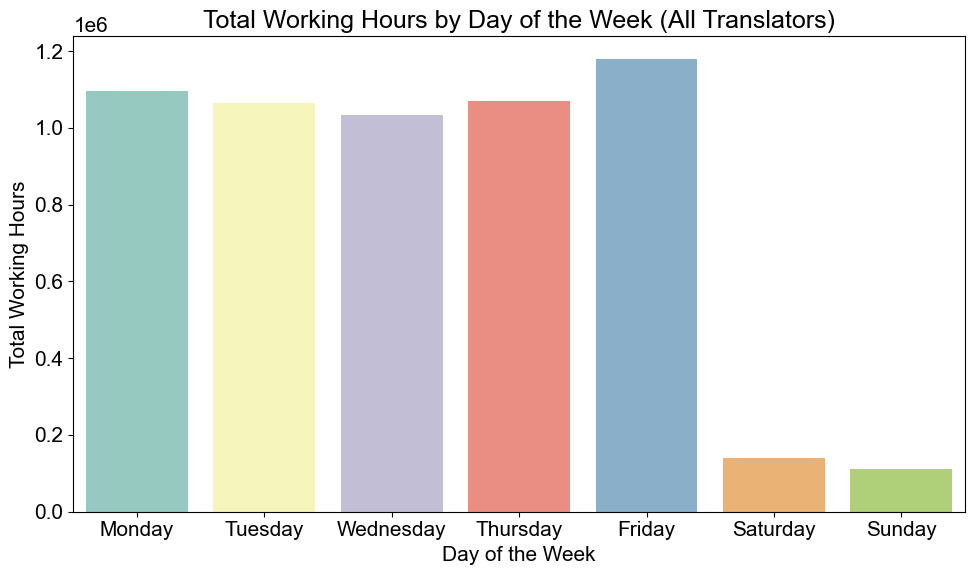

In [97]:
# Plot 

plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_hours_df, x='Weekday', y='Total_Hours', palette='Set3')
plt.title('Total Working Hours by Day of the Week (All Translators)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Working Hours')
plt.tight_layout()
plt.show()
